In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [2]:
digit = load_digits()

In [3]:
dir(digit)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df["Target"] = digit.target
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [5]:
digit.data[672]

array([ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  7., 12.,  0.,
        0.,  0.,  0.,  0.,  0., 12.,  7.,  0.,  0.,  0.,  0.,  0.,  0.,
       14.,  3.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  9., 12., 10.,  2.,
        0.,  0.,  0., 16., 13.,  8.,  8., 11.,  0.,  0.,  0., 13., 10.,
        4.,  9., 15.,  0.,  0.,  0.,  3., 10., 15.,  9.,  2.,  0.])

In [6]:
digit.data[672].reshape(8,8)

array([[ 0.,  0.,  1., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  7., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 12.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 15.,  9., 12., 10.,  2.,  0.],
       [ 0.,  0., 16., 13.,  8.,  8., 11.,  0.],
       [ 0.,  0., 13., 10.,  4.,  9., 15.,  0.],
       [ 0.,  0.,  3., 10., 15.,  9.,  2.,  0.]])

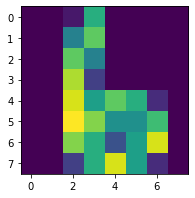

In [7]:
%matplotlib inline
plt.figure(figsize=(3,5))
plt.imshow(digit.data[672].reshape(8,8))
plt.show()

In [8]:
digit.target[672]

6

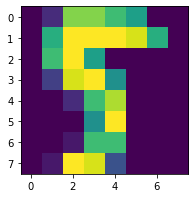

In [9]:
plt.figure(figsize=(3,5))
plt.imshow(digit.data[850].reshape(8,8))
plt.show()

In [10]:
digit.target[850]

5

In [11]:
x = df.drop("Target", axis=1)
y = df["Target"]

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=12)

In [14]:
from sklearn.linear_model import LogisticRegression
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [15]:
lg = LogisticRegression()

In [16]:
lg.fit(x_train, y_train)

LogisticRegression()

In [17]:
lg.score(x_train, y_train)

1.0

In [18]:
y_pred = lg.predict(x_test)
y_pred

array([2, 8, 7, 0, 2, 1, 8, 8, 9, 1, 5, 9, 2, 2, 1, 2, 0, 7, 7, 2, 4, 4,
       4, 7, 2, 7, 3, 6, 7, 4, 2, 3, 1, 5, 7, 0, 9, 2, 7, 2, 9, 8, 6, 5,
       1, 3, 1, 7, 1, 3, 3, 2, 3, 7, 7, 7, 1, 9, 4, 7, 4, 6, 9, 3, 0, 6,
       2, 3, 6, 0, 9, 7, 2, 0, 1, 2, 3, 3, 0, 9, 8, 1, 9, 8, 9, 4, 5, 6,
       0, 0, 3, 1, 3, 2, 4, 4, 7, 5, 6, 4, 8, 6, 4, 5, 1, 1, 4, 6, 9, 7,
       1, 5, 0, 2, 3, 5, 2, 8, 1, 7, 5, 9, 9, 7, 6, 4, 7, 3, 2, 2, 3, 0,
       0, 4, 0, 0, 5, 8, 5, 6, 4, 8, 6, 0, 7, 7, 4, 9, 4, 2, 3, 6, 7, 5,
       9, 3, 4, 9, 6, 3, 4, 9, 6, 6, 0, 3, 6, 7, 9, 1, 8, 1, 5, 0, 4, 9,
       3, 4, 0, 5, 3, 0, 5, 3, 8, 4, 3, 3, 5, 4, 1, 4, 4, 3, 7, 8, 8, 1,
       7, 8, 5, 0, 5, 3, 7, 0, 4, 1, 3, 1, 9, 5, 9, 9, 8, 3, 0, 9, 2, 0,
       3, 8, 8, 0, 6, 3, 1, 9, 3, 8, 7, 7, 1, 3, 3, 7, 0, 6, 5, 6, 1, 1,
       9, 8, 4, 5, 2, 3, 0, 9, 0, 3, 2, 7, 7, 8, 0, 4, 6, 5, 6, 5, 0, 4,
       2, 4, 6, 0, 3, 0, 6, 3, 8, 3, 7, 2, 6, 1, 4, 1, 7, 6, 4, 2, 7, 3,
       8, 6, 9, 7, 1, 5, 8, 0, 9, 7, 7, 1, 3, 3, 2,

In [19]:
accuracy_score(y_pred, y_test)

0.9685185185185186

In [20]:
confusion_matrix(y_pred, y_test)

array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  1,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 55,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0, 60,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 45,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 60,  1,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 45,  0],
       [ 0,  0,  0,  0,  1,  3,  0,  1,  0, 48]], dtype=int64)

In [21]:
import seaborn as sns

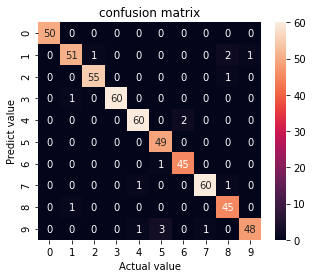

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.xlabel("Actual value")
plt.ylabel("Predict value")
plt.title("confusion matrix")
plt.show()

In [23]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.93      0.94        55
           2       0.98      0.98      0.98        56
           3       1.00      0.98      0.99        61
           4       0.97      0.97      0.97        62
           5       0.92      1.00      0.96        49
           6       0.96      0.98      0.97        46
           7       0.98      0.97      0.98        62
           8       0.92      0.98      0.95        46
           9       0.98      0.91      0.94        53

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [24]:
from sklearn.datasets import make_classification

In [53]:
data = make_classification(n_classes=2, n_features=4, n_informative=2, n_samples=1000, n_clusters_per_class=2)

In [54]:
data

(array([[-0.99024847, -0.11927378,  0.45418836, -1.22666898],
        [-1.41398918,  0.04508192,  1.33343345, -1.08837454],
        [ 0.10343014,  0.47171495,  1.41286356,  1.54218218],
        ...,
        [-1.43641321, -0.11972624,  0.82826487, -1.61528255],
        [ 1.61204077, -0.15141623, -1.83823591,  0.93285612],
        [ 0.68431733, -0.08586035, -0.84896753,  0.32954474]]),
 array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 0, 1

In [27]:
x1 = data[0]
y1 = data[1]

In [28]:
x1_tr, x1_te, y1_tr, y1_te = train_test_split(x1, y1, train_size=0.7, random_state=23)

In [29]:
lr = LogisticRegression()

In [30]:
lr.fit(x1_tr, y1_tr)

LogisticRegression()

In [31]:
y_pred_prob = lr.predict_proba(x1_te)

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

In [46]:
fpr, tpr, th = roc_curve(y1_te, y_pred_prob[:,1], pos_label=1)

In [47]:
random_prob = [0 for i in range(len(y1_te))]

In [48]:
rfpr, rtpr, rth = roc_curve(y1_te, random_prob, pos_label=1)

In [49]:
auc_score = roc_auc_score(y1_te, y_pred_prob[:,1])
auc_score

0.9587835134053622

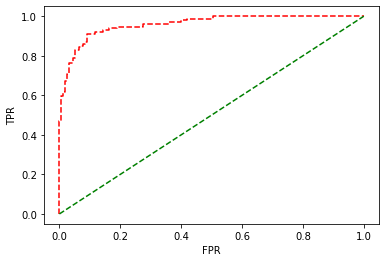

In [55]:
plt.plot(fpr, tpr, linestyle="--", color="red")
plt.plot(rfpr, rtpr, linestyle="--", color="green")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()